## Hand Written Digits Classification 
here we're classifying handwritten digits using deep neural network. The digits are first input into the network and the network is then trained to recognize the digits. The network is then able to classify the digits into one of the predefined classes.

<img src = "digits_nn.jpg" width = "700px" height = "450px"></img>

In [119]:
# required libraries:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [120]:
# So first we load the data from keras dataset:
# Note: The mnist.npz file is manually downloaded and stored in .keras/datasets directory.
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [80]:
# Let's see the lenght of x_train:
len(x_train)

60000

In [81]:
# To see the lenght of x_test:
len(x_test)

10000

In [82]:
# The see each individual sample:
x_train[0].shape   # Each sample is 28*28 fixel image.

(28, 28)

In [83]:
# And the way each sample is represented is simple 2D array:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

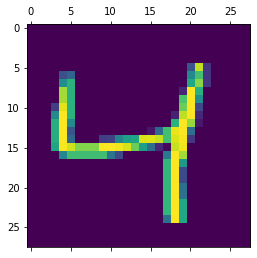

In [84]:
# If we want to plot an individual image, so we can use 'matplotlib' library:
plt.matshow(x_train[2])    # The 3rd image

In [85]:
# So if we check which number is in reality on index 2:
y_train[2]

4

In [86]:
# To print first 10 samples of y_train, so:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [87]:
# The current shape of the x_train set is:
x_train.shape

(60000, 28, 28)

In [121]:
# The next step is to platten the dataset. It means now we have 2D array but we want to convert it to 1D array(60000, 784). 
# So 1D  could be fed into the input layer of our deep learning model. To platten the 2D array, in pandas there is a 
# function called reshape which can do the conversion. The first argument is the lenght of array which is 'len(x_train)' 
# and the 2nd argument takes 28*28 to create a single dimension array.
usc_x_train_plattened = x_train.reshape(len(x_train), 28*28)
usc_x_train_plattened

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [122]:
# To print the shape of plattened array:
usc_x_train_plattened.shape

(60000, 784)

In [123]:
# Similarly to reshape the x_test:
usc_x_test_plattened = x_test.reshape(len(x_test), 28*28)
usc_x_test_plattened.shape

(10000, 784)

In [124]:
# Now to see the first individual element which should be 1-D:
usc_x_train_plattened[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [140]:
# Now we create a simple neural network which has just two layers (input and output). The way we create it, we call sequential() from keras. Sequential means that we have a stack of lequential layers in my neural network.
# So sequential accept every layer as one element, so the first element here is input which is dense (every neuron is connected with each of the neuron of the next layer). Then we define the input shape (784) and the output shape is 10.
# So in this way we're defining both input and output layers. The next argument is activation function which is 'sigmoid'.
# In the next step we compile our model and we pass a bunch of parameters. The parameters will be coverd in the feature videos.
# Next we trained the model.

Unscalled_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = "sigmoid")
])

Unscalled_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics="accuracy"
)

Unscalled_model.fit(usc_x_train_plattened, y_train, epochs=5)
# After running it's going on each sample in each epochs... and at the end of each epoch it's measuring the loss and accuracy.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 9.4760 - accuracy: 0.8417
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 6.1177 - accuracy: 0.8792
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.7398 - accuracy: 0.8826
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.5553 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.2416 - accuracy: 0.8867


In [141]:
# As we see that the time goes the accuracy is getting better and the loss is become smaller.
# To test the model on test dataset:
Unscalled_model.evaluate(usc_x_test_plattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 5.1246 - accuracy: 0.8956


[5.124635219573975, 0.8956000208854675]

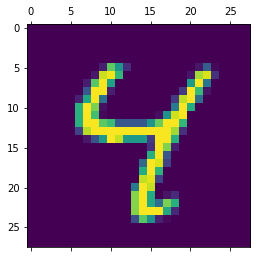

In [142]:
# To see the image on index 6:
plt.matshow(x_test[6])

In [143]:
# Now if we see the result on un scalled model:
usc_y_predicted = Unscalled_model.predict(usc_x_test_plattened)
usc_y_predicted[6]

313/313 [==============================] - 1s 1ms/step


array([0.000000e+00, 0.000000e+00, 0.000000e+00, 2.063326e-06,
       1.000000e+00, 1.000000e+00, 9.201727e-37, 9.999983e-01,
       1.000000e+00, 1.000000e+00], dtype=float32)

In [144]:
# Now to see the simple prediction on the model using numpy 'argmax' function, which find the max value and return the relevant index.
np.argmax(usc_y_predicted[6])

4

* We see the model is performing better.

In [147]:
# So the accuracy is not bad in the previous model but if we scall the values then we'll get better accuracy than the previous one. So to scall the values, as we know that each
# individual value is in range [0 to 255], so if we divide this whole array into 255, then it will be scalled from 0 to 1.
x_train = x_train/255
y_test = y_test/255

In [107]:
# Now when we see the x_train or y_test, the values will be in [0 to 1] range:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [148]:
# Now we again reshape the x_train and x_test:
sc_x_train_plattened = x_train.reshape(len(x_train), 28*28)
sc_x_test_plattened = x_test.reshape(len(x_test), 28*28)

In [149]:
# So again we create and train the model:
scalled_model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation = "sigmoid")
])

scalled_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics="accuracy"
)

scalled_model.fit(sc_x_train_plattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4711 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3045 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2836 - accuracy: 0.9199
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2737 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9255


In [150]:
# So now we see the accuracy which is better than previous time. 
# Now let's evaluate the accuray on test dataset, because the previous accuracy was on train dataset:
scalled_model.evaluate(sc_x_test_plattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2625.6060 - accuracy: 0.0966


[2625.60595703125, 0.0966000035405159]

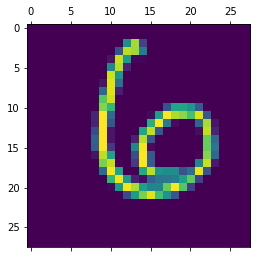

In [176]:
# The scalled model accuracy is looking very bad on test dataset, the reason is splitting the dataset into train and test samples.
# Now let's have a simple prediction:
plt.matshow(x_test[100])

In [177]:
# Now if we see the result on scalled model:
sc_y_predicted = scalled_model.predict(x_test_plattened)
sc_y_predicted[100]

313/313 [==============================] - 1s 2ms/step


array([0., 0., 1., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [178]:
# numpy 'argmax' function will find the maximum value and will output the related index.
np.argmax(sc_y_predicted[100])

2

* So we know that the model on test samples had very bad accuracy, as result the prediction is wrong.

* <p style = "color:green">This notebook was just for practice, follow the complete process of hand written digits classification using neural network in 'Hand Written Digits Classification 2 (DL-1) notebook.</p>